<a href="https://colab.research.google.com/github/violet417/violet417/blob/main/2MD%EA%B8%B0%EC%B4%88_07_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81_%ED%95%B4%EC%95%BC_%ED%95%98%EB%8A%94_%EC%9D%B4%EC%9C%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 데이터 스케일링이란?
- 데이터 전처리 과정
- 데이터 특성의 범위 또는 분포를 같게 만드는 작업

#### 데이터 표준화 방법


1. StandardScaler
from sklearn.preprocessing import standardScaler
- 모든 특성을 평균을 0으로 표준편차를 1로 변환
- 이상치에 민감

2. MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
- 특성 중 가장 작은 값을 0, 가장 큰 값을 1로 변환하여 0~1 사이의 값으로 만듦.
- 이상치에 매우 민감 

3. RobustScaler
from sklearn.preprocessing import RobustScaler
- 중앙값과 사분위 값을 사용하여 중앙값을 빼고, 사분위 값으로 나눔
- 이상치의 영향을 최소화할 수 있음

In [ ]:
import pandas as pd

fish = pd.read_csv("fish.csv")

bream = fish[fish['class'] == 1]
smelt = fish[fish['class'] == 0]

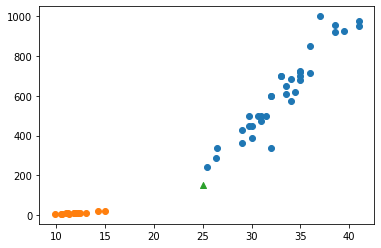

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream['length'], bream['weight'])
plt.scatter(smelt['length'], smelt['weight'])
plt.scatter(25, 150, marker = '^')  # x축은 5단위, y축은 200단위로 움직임

In [ ]:
data = fish[['length', 'weight']].to_numpy()
target = fish['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

1.0

In [ ]:
knn.predict([[25, 150]])  
# x축은 5단위, y축은 200단위로 움직임, 무게를 더 중요하게 생각함. / 빙어로 예측 

array([0])

In [ ]:
import numpy as np

mean = np.mean(train_input, axis = 0)   # 행방향
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std   # 모르는 데이터의 평균 및 표준편차를 알 수 없음. 
test_scaled = (test_input - mean) / std     # 컴퓨터가 예측할 때는 모든 게 훈련데이터로 기반이 되어 있어야 함
                                            # 훈련데이터로 학습한 것을 기준으로 모르는 것을 예측

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target) # 데이터 분할 및 데이터 표준화를 했기 때문에 
                                    # 이번에 평가 100점은 어느정도 신뢰가 간다.

1.0

In [ ]:
new = ([25,150] - mean) / std
new

array([-0.11938575, -0.83424743])

In [ ]:
knn.predict([new])

array([1])